In [1]:
import networkx as nx
import matplotlib.pyplot as plt 
import time
import gc
import pandas as pd
import numpy as np
from ranking import *


In [21]:

def measure_pagerank_time(data, user_id_column,
                          movie_id_column, rating_column,
                          pers=1, count_measure=3, directional = False):
    """
    Измеряет время выполнения создания объекта PageRank и время вычисления 
    PageRank для заданных данных, уменьшая влияние сборщика мусора.

    Args:
        data: DataFrame с данными рекомендаций.
        user_id_column: Название столбца с ID пользователей.
        movie_id_column: Название столбца с ID фильмов.
        rating_column: Название столбца с рейтингом.
        pers: Параметр pers для PagerankFactory.
        count_measure: Количество измерений (для усреднения).

    Returns:
        Tuple: Время создания объекта PageRank (в секундах), 
               время выполнения get_pagerank (в секундах).
    """
    gc.collect()

    # Измеряем время создания объекта
    start_time_creation = time.time()
    pg = PagerankFactory().read_pd(data, user_id_column, movie_id_column, rating_column, pers, directional)
    end_time_creation = time.time()
    creation_time = end_time_creation - start_time_creation

    # Измеряем время выполнения get_pagerank
    start_time_calculation = time.time()
    for _ in range(count_measure):
        _ = pg.get_pagerank()
    end_time_calculation = time.time()
    execution_time = (end_time_calculation - start_time_calculation) / count_measure

    return creation_time, execution_time

In [5]:
def measure_hits_time(data, user_id_column,
                          movie_id_column, rating_column,
                          pers=1, count_measure=3, directional = False):
    gc.collect()

    # Измеряем время создания объекта
    start_time_creation = time.time()
    pg = HITSFactory().read_pd(data, user_id_column, movie_id_column, rating_column, pers, directional)
    end_time_creation = time.time()
    creation_time = end_time_creation - start_time_creation

    # Измеряем время выполнения get_pagerank
    start_time_calculation = time.time()
    for _ in range(count_measure):
        _ = pg.get_rank()
    end_time_calculation = time.time()
    execution_time = (end_time_calculation - start_time_calculation) / count_measure

    return creation_time, execution_time

In [22]:
def plot_time(filename):
    """
    Строит график зависимости времени выполнения  от размера выборки.

    Args:
        filename: Имя файла CSV с данными о времени выполнения.
    """
    df = pd.read_csv(filename)

    # Строим график
    plt.plot(df['Размер выборки'], df['Время выполнения'], marker='o')

    # Настраиваем оси и заголовок графика
    plt.xlabel('Доля набора данных')
    plt.ylabel('Время выполнения (секунды)')
    plt.title('Зависимость времени выполнения  от размера выборки')
    plt.grid()

    # Отображаем график
    plt.show()

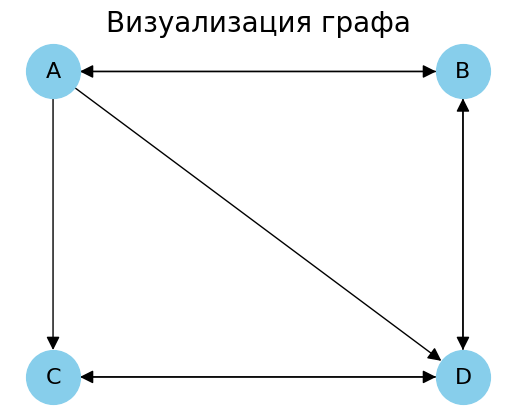

In [13]:

# Задаем позиции узлов
pos = {'A': (0, 2), 'B': (2, 2), 'C': (0, 0), 'D': (2, 0)}
# Создаем граф (используем граф из предыдущих примеров)
graph = nx.DiGraph()  # DiGraph - для ориентированного графа
graph.add_edges_from([('A', 'B'), ('B', 'A'),
                      ('B', 'D'), ('D', 'B'),
                      ('D', 'C'), ('C', 'D'),
                      ('A', 'C'),
                      ('A', 'D')])


plt.title("Визуализация графа", fontsize=20) 
# Визуализируем граф
nx.draw(graph, pos=pos, with_labels=True, node_size=1500, node_color='skyblue', font_size=16, arrowsize=20)
plt.show()

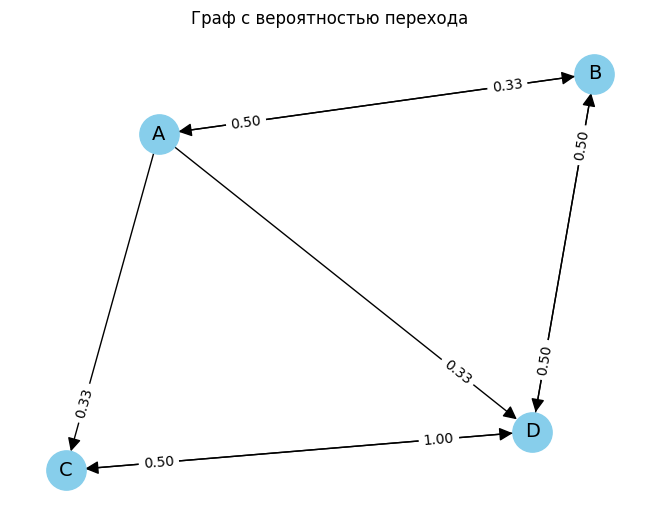

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_transition_matrix(matrix):
    """
    Визуализирует матрицу переходов в виде графа,
    где веса ребер - значения из матрицы,
    с учетом разных весов для (A, B) и (B, A).

    Args:
        matrix: Матрица переходов (список списков).
    """

    num_nodes = len(matrix)
    graph = nx.DiGraph()

    ABCDE = "ABCDE"
    for i in range(num_nodes):
        for j in range(num_nodes):
            weight = matrix[i][j]
            if weight > 0:
                # Добавляем ребро с весом 
                graph.add_edge(ABCDE[i], ABCDE[j], weight=weight)

    # Создаем словарь с подписями для ребер,
    # используем оба направления для ключа
    edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in graph.edges(data=True)}

    # Размещаем узлы, избегая наложения
    pos = nx.spring_layout(graph, k=0.3*1/num_nodes)

    # Рисуем граф
    nx.draw(graph, pos, with_labels=True, node_size=800, node_color='skyblue', font_size=14, arrowsize=20)

    # Добавляем подписи на ребра с учетом смещения
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10, label_pos=0.2)

    plt.title("Граф с вероятностью перехода")
    plt.show()

# Пример матрицы переходов (из предыдущих примеров)
matrix = [
    [0, 0.33, 0.33, 0.33],
    [0.5,   0,   0,  0.5],
    [0,   0,   0,  1],
    [0,   0.5,   0.5,  0]
]

# Визуализируем граф
visualize_transition_matrix(matrix)

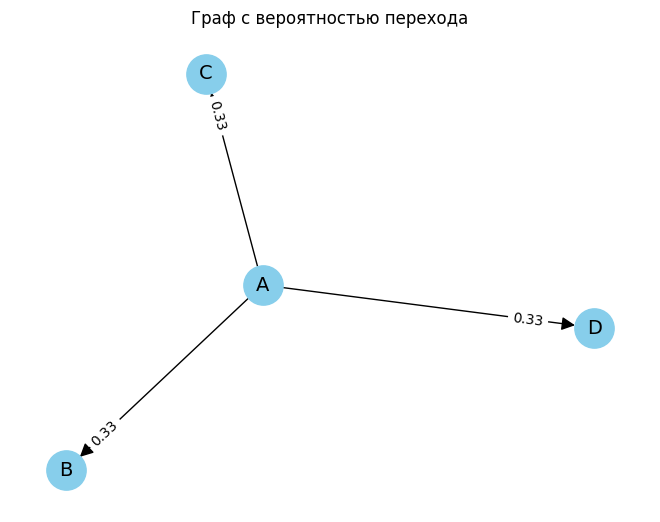

In [15]:
# Пример матрицы переходов (из предыдущих примеров)
matrix = [
    [0, 0.33, 0.33, 0.33],
    [0,   0,   0,  0],
    [0,   0,   0,  0],
    [0,   0,   0,  0]
]

# Визуализируем граф
visualize_transition_matrix(matrix)

In [23]:
df = pd.read_csv("res\\movie\\rating.csv")

# Создаем список для хранения данных о времени выполнения
results = []

# Пример использования:
for i in np.arange(0.1, 1 + 0.1, 0.1):
    data = df.sample(frac=i)
    creation_time, execution_time = measure_hits_time(data, 'userId', 'movieId', 'rating', count_measure=8)
    print(f"Время создания: {creation_time:.4f} секунд")
    print(f"Время выполнения: {execution_time:.4f} секунд")
    print(f"Размер {i}")
    results.append([i, execution_time, creation_time])

# Создаем DataFrame из полученных данных
results_df = pd.DataFrame(results, columns=['Размер выборки', 'Время выполнения', 'Время создания'])

# Сохраняем DataFrame в файл CSV
results_df.to_csv('hits_time_results.csv', index=False)

KeyboardInterrupt: 

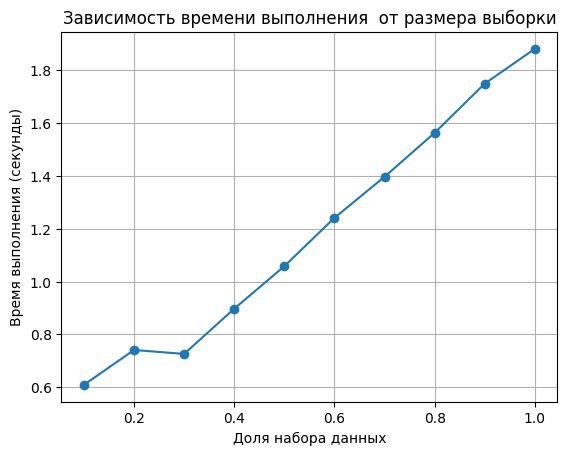

In [5]:
plot_time('hits_time_results.csv')

In [3]:
filename = './res/google_graph/web-Google.txt'
skiprows = 0
with open(filename , 'r') as f:
    for line in f:
        if line[0] != "#":
            break
        skiprows += 1

df = pd.read_csv(filename , sep='\t', header=None,
                   skiprows=skiprows, dtype=int,
                   names=['source', 'target'])
df['edge_attr'] = 1

In [6]:
# Создаем список для хранения данных о времени выполнения
results = []

# Пример использования:
for i in np.arange(0.1, 1 + 0.1, 0.1):
    data_slice = df.sample(frac=i)
    creation_time, execution_time = measure_hits_time(data_slice, 'source', 'target', 'edge_attr',data_slice['source'].min(), 3, False)
    print(f"Время создания: {creation_time:.4f} секунд")
    print(f"Время выполнения: {execution_time:.4f} секунд")
    print(f"Размер {i}")
    results.append([i, execution_time, creation_time])

# Создаем DataFrame из полученных данных
results_df = pd.DataFrame(results, columns=['Размер выборки', 'Время выполнения', 'Время создания'])

# Сохраняем DataFrame в файл CSV
results_df.to_csv('hits_python_time_results_web.csv', index=False)

C:\Users\odo20\AppData\Roaming\Python\Python312\site-packages\scipy\sparse\_base.py:713: RuntimeWarning: divide by zero encountered in divide
  recip = np.true_divide(1., other)


Время создания: 1.1350 секунд
Время выполнения: 2.4616 секунд
Размер 0.1


KeyboardInterrupt: 

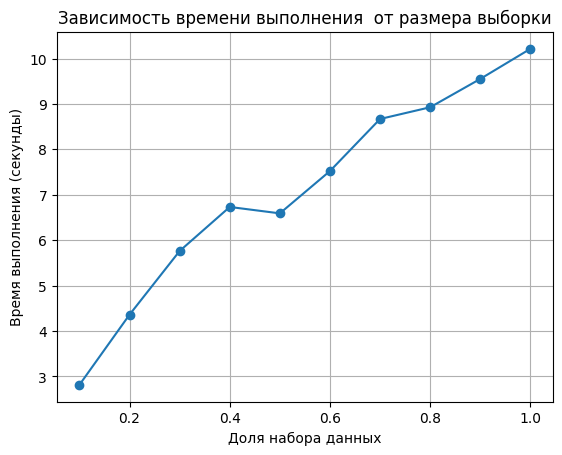

In [9]:
plot_time('hits_python_time_results_web.csv')

In [15]:
import scipy as sp
import numpy as np
from scipy.sparse.linalg import svds
import time

rows = 1000
cols = 1000

# Генерация случайной матрицы
m = [[0, 1/3, 1/3, 1/3],
     [1/2, 0, 0, 1/2],
     [0, 0, 0, 1],
     [0, 1/2, 1/2, 0]]#np.random.rand(rows, cols) * 3 - 1
A = sp.sparse.csr_matrix(m, dtype=float)  # Явно указываем тип данных как float

t1 = time.time()
_, _, vt = svds(A, k=1) 
t2 = time.time()
print(f"Время {t2-t1}")
print(vt.real )

Время 0.0010006427764892578
[[-0.19993654 -0.1467283  -0.1467283  -0.95758394]]


In [17]:
data = pd.read_csv('./res/google_graph/web-Google.txt', sep="\t", header=None)
data.columns = ['source', 'target']
data['edge_attr'] = 1
# Создаем список для хранения данных о времени выполнения
results = []

# Пример использования:
for i in np.arange(0.1, 1 + 0.1, 0.1):
    data_slice = data.sample(frac=i)
    creation_time, execution_time = measure_pagerank_time(data_slice, 'source', 'target', 'edge_attr', data_slice['source'].min(), 3, True)
    print(f"Время создания: {creation_time:.4f} секунд")
    print(f"Время выполнения: {execution_time:.4f} секунд")
    print(f"Размер {i}")
    results.append([i, execution_time, creation_time])

# Создаем DataFrame из полученных данных
results_df = pd.DataFrame(results, columns=['Размер выборки', 'Время выполнения', 'Время создания'])

# Сохраняем DataFrame в файл CSV
results_df.to_csv('pagerank_python_time_results_web.csv', index=False)

100%|██████████| 100/100 [00:05<00:00, 17.07it/s]


Время создания: 1.2144 секунд
Время выполнения: 7.1841 секунд
Размер 0.1


100%|██████████| 100/100 [00:14<00:00,  6.98it/s]


Время создания: 2.1058 секунд
Время выполнения: 16.2950 секунд
Размер 0.2


100%|██████████| 100/100 [00:24<00:00,  4.15it/s]


Время создания: 2.8757 секунд
Время выполнения: 26.5075 секунд
Размер 0.30000000000000004


100%|██████████| 100/100 [00:35<00:00,  2.78it/s]


Время создания: 3.6583 секунд
Время выполнения: 37.9395 секунд
Размер 0.4


100%|██████████| 100/100 [00:45<00:00,  2.21it/s]


Время создания: 4.3459 секунд
Время выполнения: 48.4973 секунд
Размер 0.5


100%|██████████| 100/100 [00:55<00:00,  1.79it/s]


Время создания: 5.1015 секунд
Время выполнения: 59.3202 секунд
Размер 0.6


100%|██████████| 100/100 [01:07<00:00,  1.47it/s]


Время создания: 5.8848 секунд
Время выполнения: 71.1058 секунд
Размер 0.7000000000000001


100%|██████████| 100/100 [01:18<00:00,  1.27it/s]


Время создания: 6.6158 секунд
Время выполнения: 82.2329 секунд
Размер 0.8


100%|██████████| 100/100 [01:29<00:00,  1.12it/s]


Время создания: 7.4400 секунд
Время выполнения: 94.0154 секунд
Размер 0.9


100%|██████████| 100/100 [01:49<00:00,  1.09s/it]


Время создания: 8.2206 секунд
Время выполнения: 113.6015 секунд
Размер 1.0


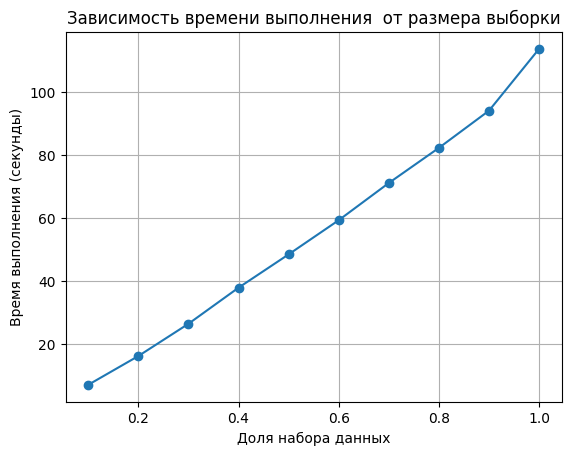

In [18]:
plot_time('pagerank_python_time_results_web.csv')

In [22]:
data = pd.read_csv('./res/google_graph/web-Google.txt', sep="\t", header=None)
data.columns = ['source', 'target']
data['edge_attr'] = 1

g = nx.from_pandas_edgelist(data, 'source', 'target', 'edge_attr', nx.DiGraph())

In [23]:
import networkx as nx



# Считаем количество входящих ребер для каждой вершины
in_degrees = dict(g.in_degree())

out_degrees = dict(g.out_degree())
in_degrees_values = in_degrees.values()
out_degrees_values = out_degrees.values()


In [35]:
def remove_outliers_three_sigma(data):
    """
    Отбрасывает выбросы из массива по правилу трёх сигм.

    Args:
        data: Одномерный массив NumPy.

    Returns:
        Новый массив NumPy без выбросов.
    """

    data = np.array(data) 
    mean = np.mean(data)  # среднее значение
    std = np.std(data)  # стандартное отклонение

    # Границы выбросов
    upper_bound = mean + 3 * std
    lower_bound = mean - 3 * std

    # Фильтрация данных: оставляем только значения в пределах границ
    filtered_data = data[(data >= lower_bound) & (data <= upper_bound)]

    return filtered_data

remove_outliers_three_sigma([1, 2.3, 2, 3.2])


array([1. , 2.3, 2. , 3.2])

In [36]:
print(list(in_degrees_values)[:10])

[212, 200, 4, 208, 206, 22, 75, 9, 9, 9]


In [44]:
filtered_data = remove_outliers_three_sigma(list(in_degrees_values))
median_value = np.percentile(filtered_data, 50)
median_value

1.0

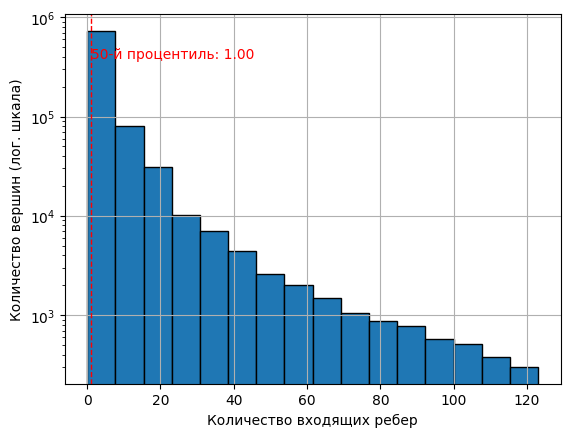

In [38]:
filtered_data = remove_outliers_three_sigma(list(in_degrees_values))
# Строим гистограмму
plt.hist(filtered_data, bins=16, edgecolor='black')

# Вычисляем медиану (50-й процентиль)
median_value = np.percentile(filtered_data, 50)

# Добавляем вертикальную линию для обозначения медианы
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=1)

# Добавляем текстовое обозначение для медианы
plt.text(median_value, plt.ylim()[1]*0.5, f'50-й процентиль: {median_value:.2f}', color='red')

plt.yscale('log')

# Добавляем метку для оси Y, чтобы было понятно, что используется логарифмическая шкала
plt.ylabel('Количество вершин (лог. шкала)')
plt.xlabel('Количество входящих ребер')
plt.grid()
# Показываем гистограмму
plt.show()

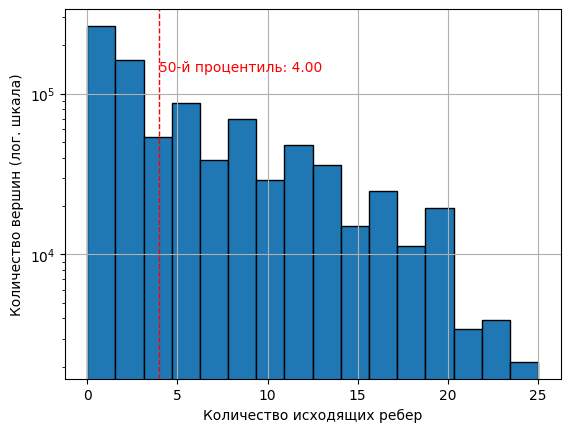

In [45]:
filtered_data = remove_outliers_three_sigma(list(out_degrees_values))
# Строим гистограмму
plt.hist(filtered_data,
         bins=16, edgecolor='black')

# Вычисляем медиану (50-й процентиль)
median_value = np.percentile(filtered_data, 50)

# Добавляем вертикальную линию для обозначения медианы
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=1)

# Добавляем текстовое обозначение для медианы
plt.text(median_value, plt.ylim()[1]*0.5, f'50-й процентиль: {median_value:.2f}', color='red')

plt.yscale('log')

# Добавляем метку для оси Y, чтобы было понятно, что используется логарифмическая шкала
plt.ylabel('Количество вершин (лог. шкала)')
plt.xlabel('Количество исходящих ребер')
plt.grid()
# Показываем гистограмму
plt.show()

In [46]:
df = pd.read_csv("res\\movie\\rating.csv")

source = 'userId'
target = 'movieId'

source_uniq = df[source].unique()
target_uniq = df[target].unique()

obj_source_to_N = dict(zip(source_uniq, range(len(source_uniq))))
obj_target_to_N = dict(zip(target_uniq,
                            range(len(source_uniq), len(source_uniq) + len(target_uniq))))

N_to_obj = {}
N_to_obj.update({i: (obj, 'source') for i, obj in enumerate(source_uniq)})
N_to_obj.update({i: (obj, 'target') for i, obj in enumerate(target_uniq, start=len(source_uniq))})

data = pd.DataFrame()
count_top = len(source_uniq) + len(target_uniq)
start_node = df[source].apply(lambda x: obj_source_to_N[x])
end_node = df[target].apply(lambda x: obj_target_to_N[x])

data['userId'] = start_node
data['movieId'] = end_node
data['rating'] = df['rating']

In [47]:

g = nx.from_pandas_edgelist(data, source, target, 'rating')

In [48]:
df['movieId'].value_counts()

movieId
296       67310
356       66172
318       63366
593       63299
480       59715
          ...  
125545        1
78873         1
112907        1
112909        1
110510        1
Name: count, Length: 26744, dtype: int64

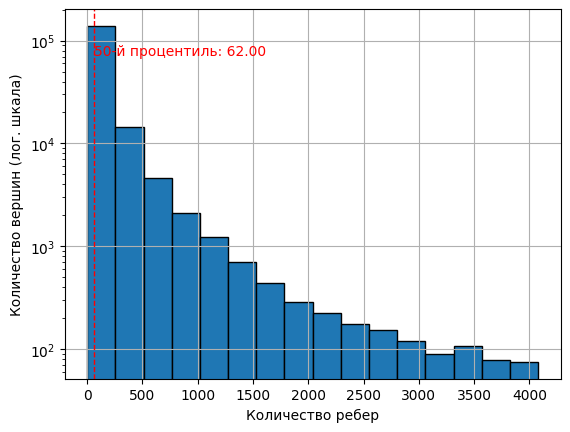

In [49]:

import networkx as nx



# Считаем количество входящих ребер для каждой вершины
degrees = dict(g.degree())

filtered_data = remove_outliers_three_sigma(list(degrees.values()))

# Строим гистограмму
plt.hist(filtered_data, bins=16, edgecolor='black')

# Вычисляем медиану (50-й процентиль)
median_value = np.percentile(filtered_data, 50)

# Добавляем вертикальную линию для обозначения медианы
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=1)

# Добавляем текстовое обозначение для медианы
plt.text(median_value, plt.ylim()[1]*0.5, f'50-й процентиль: {median_value:.2f}', color='red')


plt.yscale('log')

# Добавляем метку для оси Y, чтобы было понятно, что используется логарифмическая шкала
plt.ylabel('Количество вершин (лог. шкала)')
plt.xlabel('Количество ребер')
plt.grid()
# Показываем гистограмму
plt.show()

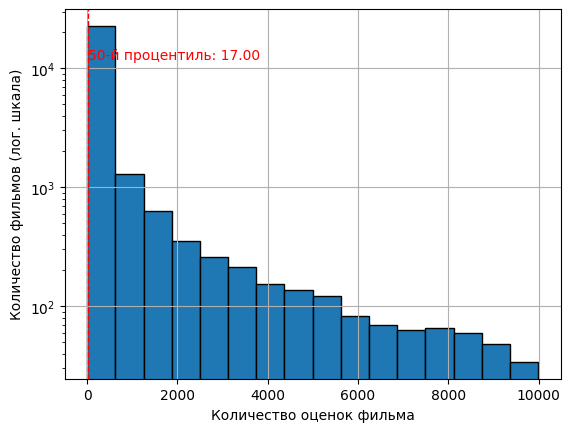

In [51]:
filtered_data = remove_outliers_three_sigma(df['movieId'].value_counts())
# Строим гистограмму
plt.hist(filtered_data,
         bins=16, edgecolor='black')

# Вычисляем медиану (50-й процентиль)
median_value = np.percentile(filtered_data, 50)

# Добавляем вертикальную линию для обозначения медианы
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=1)

# Добавляем текстовое обозначение для медианы
plt.text(median_value, plt.ylim()[1]*0.5, f'50-й процентиль: {median_value:.2f}', color='red')


plt.yscale('log')

# Добавляем метку для оси Y, чтобы было понятно, что используется логарифмическая шкала
plt.ylabel('Количество фильмов (лог. шкала)')
plt.xlabel('Количество оценок фильма')
plt.grid()
# Показываем гистограмму
plt.show()

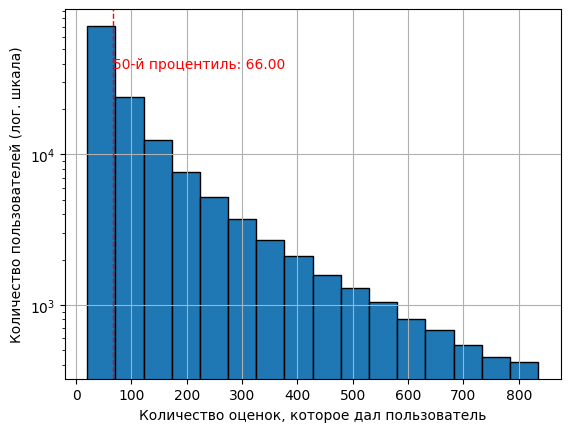

In [50]:
filtered_data = remove_outliers_three_sigma(df['userId'].value_counts())
# Строим гистограмму
plt.hist(filtered_data,
         bins=16, edgecolor='black')

# Вычисляем медиану (50-й процентиль)
median_value = np.percentile(filtered_data, 50)

# Добавляем вертикальную линию для обозначения медианы
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=1)

# Добавляем текстовое обозначение для медианы
plt.text(median_value, plt.ylim()[1]*0.5, f'50-й процентиль: {median_value:.2f}', color='red')


plt.yscale('log')

# Добавляем метку для оси Y, чтобы было понятно, что используется логарифмическая шкала
plt.ylabel('Количество пользователей (лог. шкала)')
plt.xlabel('Количество оценок, которое дал пользователь')
plt.grid()
# Показываем гистограмму
plt.show()

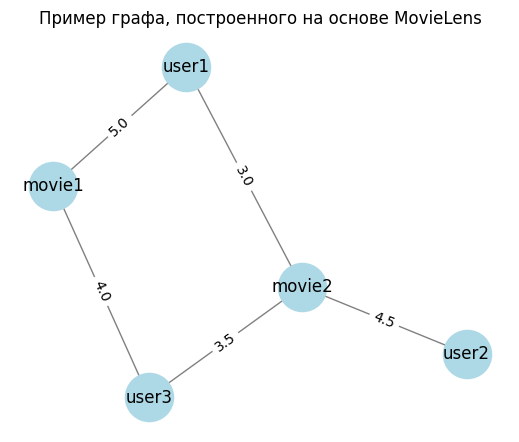

In [84]:
example_data = {
    'userId' : ['user1', 'user1', 'user2', 'user3', 'user3'],
    'movieId' : ['movie1', 'movie2', 'movie2', 'movie1', 'movie2'],
    'rating' : [5, 3, 4.5, 4, 3.5]
    
}
example_dataframe = pd.DataFrame(example_data)

# Создаем граф, передавая 'rating' в edge_attr
example_graph = nx.from_pandas_edgelist(example_dataframe, 'userId', 'movieId', 'rating')

# Получаем словарь весов ребер
edge_labels = nx.get_edge_attributes(example_graph, 'rating')
plt.figure(figsize=(5, 4))
# Рисуем граф
pos = nx.spring_layout(example_graph)
nx.draw(example_graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1200 )

# Добавляем подписи ребер с рейтингом
nx.draw_networkx_edge_labels(example_graph, pos, edge_labels=edge_labels)

plt.title("Пример графа, построенного на основе MovieLens")
plt.show()